# Data Loading

In [ ]:
# Import analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get dataset
!git clone https://github.com/LimJY03/HousePricePrediction.git

Cloning into 'HousePricePrediction'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 9.42 KiB | 2.36 MiB/s, done.


In [ ]:
# Read data
df = pd.read_csv('HousePricePrediction/data.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Inspection

In [ ]:
# Get df dimension
df.shape

(545, 13)

In [ ]:
# Get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Get df stats
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Check if data has null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Preprocessing

In [ ]:
# Perform One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

binary_categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_categorical_features] = df[binary_categorical_features].apply(lambda x: x.map({'yes': 1, 'no': 0}))  

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['furnishingstatus']]))
ohe_df.columns = ohe.get_feature_names_out()

df = pd.concat([df, ohe_df], axis=1)
df.drop(['furnishingstatus'], axis=1, inplace=True)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0,1.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.0,0.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0,1.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0.0,0.0


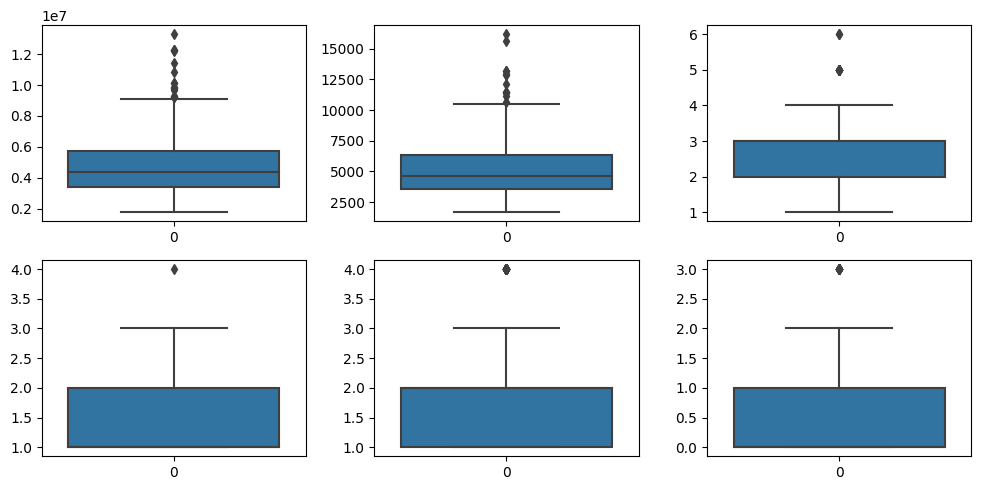

In [ ]:
# Check presence of outlier
numeric_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, ax = plt.subplots(2, 3, figsize=(10,5))

for idx, numeric_feature in enumerate(numeric_features):
    sns.boxplot(df[numeric_feature], ax=ax[(idx // 3), (idx % 3)])

plt.tight_layout()

In [ ]:
# Removing outliers from price and area
remove_outliers = ['price', 'area']

for col in remove_outliers:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df = df[
        (df[col] >= Q1 - (1.5 * IQR)) & 
        (df[col] <= Q3 + (1.5 * IQR))
    ]

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1.0,0.0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0.0,1.0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0.0,0.0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0.0,0.0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0,1.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.0,0.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0,1.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0.0,0.0


In [ ]:
# Scale numeric features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_features[1:]] = scaler.fit_transform(df[numeric_features[1:]])

# Model Training and Evaluation

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

y = df.pop('price')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1006)

In [ ]:
# Create model class
class Model:

    def __init__(self, model=None, model_name=''):
        self.model = model
        self.model_name = model_name
        self.r2_score = None
        self.rmse = None

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

In [ ]:
# Create model trialing list
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, SGDRegressor, HuberRegressor
from xgboost import XGBRegressor

model_lists = [
    Model(model=LinearRegression(), model_name='Linear Regression'),
    Model(model=ElasticNet(), model_name='ElasticNet Regression'),
    Model(model=Lasso(), model_name='Lasso Regression'),
    Model(model=Ridge(), model_name='Ridge Regression'),
    Model(model=SGDRegressor(), model_name='Stochastic Gradient Descent Regression'),
    Model(model=HuberRegressor(), model_name='Huber Regression'),
    Model(model=XGBRegressor(), model_name='Extreme Gradient Boosting Regression'),
]

In [ ]:
# Model trialing
from sklearn.metrics import r2_score, mean_squared_error

for model in model_lists:
    
    # Model training and prediction
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    # Model evaluation
    model.rmse = mean_squared_error(y_test, y_predict, squared=False)
    model.r2_score = r2_score(y_test, y_predict)

    print(f'{model.model_name}:\n==================================================')
    print(f'Root Mean Squared Error: {model.rmse}')
    print(f'R2 Score: {model.r2_score}')
    print('==================================================\n')

Linear Regression:
Root Mean Squared Error: 1120960.2378686573
R2 Score: 0.5630673307299316

ElasticNet Regression:
Root Mean Squared Error: 1454452.9358189988
R2 Score: 0.264414012509431

Lasso Regression:
Root Mean Squared Error: 1120960.8759968984
R2 Score: 0.5630668332650874

Ridge Regression:
Root Mean Squared Error: 1122758.1109532285
R2 Score: 0.5616646414668807

Stochastic Gradient Descent Regression:
Root Mean Squared Error: 1116387.4119091292
R2 Score: 0.5666248908413505

Huber Regression:
Root Mean Squared Error: 1441039.2680002174
R2 Score: 0.2779193067110901

Extreme Gradient Boosting Regression:
Root Mean Squared Error: 1250091.0964150024
R2 Score: 0.4566027623876846



In [ ]:
# Determine best model
r2_score_max, rmse_min = 0, float('inf')
r2_score_max_model, rmse_min_model = '', ''

for model in model_lists:

    if (model.rmse < rmse_min):
        rmse_min = model.rmse
        rmse_min_model = model.model_name

    if (model.r2_score > r2_score_max):
        r2_score_max = model.r2_score
        r2_score_max_model = model.model_name

print(f'Lowest RMSE: {rmse_min_model} ({rmse_min})')
print(f'Highest R2 Score: {r2_score_max_model} ({r2_score_max})')

Lowest RMSE: Stochastic Gradient Descent Regression (1116387.4119091292)
Highest R2 Score: Stochastic Gradient Descent Regression (0.5666248908413505)


# Conclusion

After trialing with several models from `sklearn.linear_model` with default hyperparameter values, Stochastic Gradient Descent (SGD) Regressor has the lowest RMSE and the highest R2 Score.